#**Machine Learning lab 10**
**Name:** Deedahwar Mazhar

**Class:** BESE 9A 

**CMS:** 243516 

# 1. Boosting (AdaBoost)
In this lab you will use a decision tree classifier with max depth=1 as base classifier (weak learner) and use AdaBoost technique to learn a strong classifier. AdaBoost works by putting more weight on difficult to classify instances and less on those already handled well.

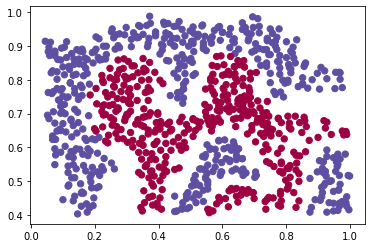

In [ ]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  
%matplotlib inline

# plot decision boundary
def plot_decision_boundary(model,X):
    # Set min and max values and give it some padding
    x_min, x_max = X[:,0].min() - .1, X[:,0].max() + .1
    y_min, y_max = X[:,1].min() - .1, X[:,1].max() + .1
    h = 0.01

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    d = np.c_[xx.ravel(), yy.ravel()]

    # Predict the function value for the whole grid
    Z = model.predict(d)
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=.5)


    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

    plt.title('Decision Boundary')
    plt.show()

    
# load data
raw_data = loadmat('ex6data2.mat')
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])  
data['y'] = raw_data['y']
X = np.array(data[['X1', 'X2']])
y = np.array(data['y'])

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

## Implementation
Use sklearn.ensemble.AdaBoostClassifier to classify the above dataset. Use decision tree classifier with max depth=1 (aka decision stump) as weak classifier.  

In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics

# TODO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
stump = DecisionTreeClassifier(max_depth=1)
stump=stump.fit(X, y)



y_pred = stump.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)




Accuracy:  0.6589595375722543


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

adaClass = AdaBoostClassifier(base_estimator=stump)
adaClass = adaClass.fit(X_train, y_train)

y_pred = adaClass.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)




Accuracy:  0.9017341040462428


## Question:
AdaBoost works by putting more weight on difficult to classify instances and less on those already handled well. How this information is passed to the weak learner (Decision stump)?


 

**Answer:** After a stump is trained at any level, ADA Boost assigns a weight to each training item, this weight depends on the degree of misclassification. Misclassified items are assigned higher weights to ensure that they appear in the training subset of the next stump with higher probability. In this way, ADA Boost tracks misclassifications and learns from them simultaneously. 

Eventually, weight is assigned to classifiers depending on their accuracy as well. An accuracy of 50% has 0 weight and below that is negative.

## Implementation:
Compute the **unnormalized error rate**, **classifier coefficient** and **updated data weights** for decision stump at m = 2.  

<img src="adaboost.png" style="width:650px;height:300px;">

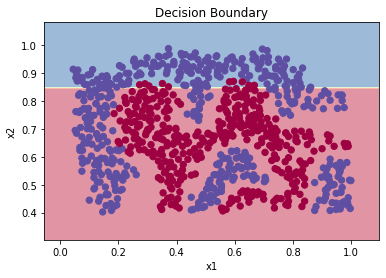

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

stump = DecisionTreeClassifier(max_depth=1)
stump.fit(X, y)

plot_decision_boundary(stump, X)

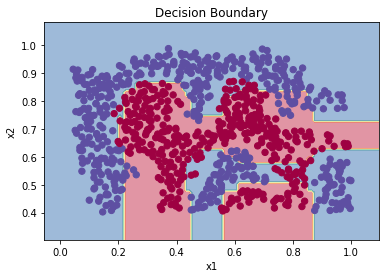

In [ ]:
#TODO
plot_decision_boundary(adaClass, X)


In [ ]:
stump = DecisionTreeClassifier(max_depth=2)
stump=stump.fit(X, y)
adaClass = AdaBoostClassifier(base_estimator=stump)
adaClass = adaClass.fit(X, y)

print("Error Rates: ", str(adaClass.estimator_errors_))

print(" Mean Error Rate: ", str(adaClass.estimator_errors_.mean()))

print("Updated data weights: ", str(adaClass.estimator_weights_))

coefs = []

for clf, weight in zip(adaClass.estimators_, adaClass.estimator_weights_):
  coefs.append(clf.feature_importances_[0]*weight)

print("Classifier Coefficients: ", str(coefs))

print("Mean Classifier Coefficient: ", str(np.array(coefs).mean()))





Error Rates:  [0.23406721 0.28362719 0.29036437 0.34344298 0.38673084 0.38809112
 0.19256092 0.34602047 0.30883018 0.37762841 0.41313794 0.40887994
 0.39428577 0.37475974 0.344424   0.37967547 0.37693867 0.41907309
 0.41417516 0.39781183 0.23157313 0.40388384 0.247905   0.2778983
 0.36556872 0.3783261  0.35326657 0.37195187 0.36703346 0.25955627
 0.41923362 0.17745048 0.31562126 0.27248635 0.39272684 0.2450321
 0.34567474 0.27682421 0.40973314 0.38863936 0.45372303 0.4027325
 0.39676234 0.45861668 0.35268989 0.29039225 0.36440601 0.23468676
 0.40284023 0.37546866]
 Mean Error Rate:  0.34614458040797
Updated data weights:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
Classifier Coefficients:  [0.4996303627432808, 0.17753894920888727, 1.0, 0.3196511752593477, 0.6431511623384758, 0.28338688956526814, 0.9430717916628969, 0.21745590402895676, 1.0, 0.5403771763683753, 0.49826615104168

# **NOTE:**

It was not completely clear to me what was implied by "Classification Coefficients". I went through the sklearn documentation and there was no attribute that mentioned coeffecients like the "coefs_" attribute in Logistic Regression. However, in one source, I read that feature importances multiplied by weight of each decision tree can be categorized as coefficients. Therefore, I have retrieved the values of feature importance for all stumps and calculated their mean. 